In [1]:
!pip install networkx matplotlib


Forwarding Tables:

Node u:
  to v -> v
  to w -> x
  to x -> x
  to y -> x
  to z -> x

Node v:
  to u -> u
  to w -> w
  to x -> x
  to y -> x
  to z -> x

Node w:
  to u -> y
  to v -> v
  to x -> y
  to y -> y
  to z -> y

Node x:
  to u -> u
  to v -> v
  to w -> y
  to y -> y
  to z -> y

Node y:
  to u -> x
  to v -> x
  to w -> w
  to x -> x
  to z -> z

Node z:
  to u -> y
  to v -> y
  to w -> y
  to x -> y
  to y -> y


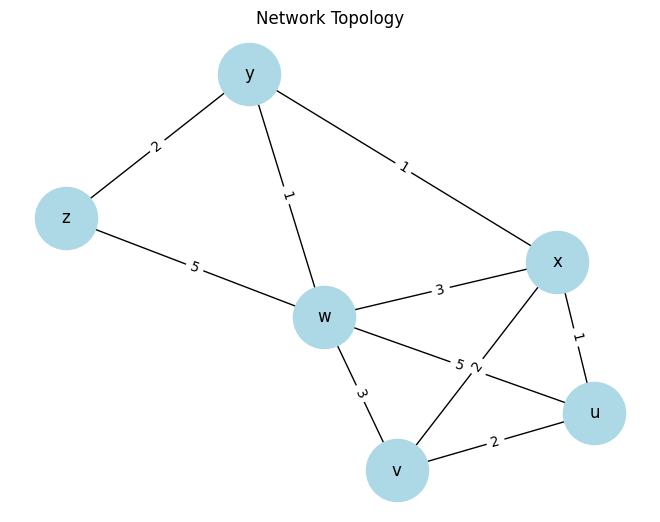

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

with open("input.txt", "r") as file:
    input_data = file.read()

def parsing(data):
    lines = [x.strip() for x in data.strip().splitlines()]
    n, m = map(int, lines[0].split(','))
    edges = []
    for x in lines[1:]:
        src_node, dest_node, weight = x.split(',')
        edges.append((src_node, dest_node, int(weight)))
    return n, m, edges

def build_graph(edges):
    G = nx.Graph()
    for src_node, dest_node, weight in edges:
        G.add_edge(src_node, dest_node, weight=weight)
    return G

def dijkstra(graph, start):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph.nodes()}
    previous = {node: None for node in graph.nodes()}
    distances[start] = 0

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor]['weight']
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous

def generate_forwarding_table(graph):
    forwarding_tables = {}
    for node in graph.nodes():
        _, previous = dijkstra(graph, node)
        table = {}
        for dest in graph.nodes():
            if dest == node:
                continue
            next_hop = dest
            while previous[next_hop] != node and previous[next_hop] is not None:
                next_hop = previous[next_hop]
            table[dest] = next_hop if previous[dest] is not None else "-"
        forwarding_tables[node] = table
    return forwarding_tables

def draw_topology(graph):
    pos = nx.spring_layout(graph, seed=42)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.title("Network Topology")
    plt.show()

def main():
    n, m, edges = parsing(input_data)
    graph = build_graph(edges)

    print("\nForwarding Tables:")
    forwarding_tables = generate_forwarding_table(graph)
    for node, table in forwarding_tables.items():
        print(f"\nNode {node}:")
        for dest, next_hop in table.items():
            print(f"  to {dest} -> {next_hop}")

    draw_topology(graph)


main()